# G2EGM


This notebook produces the timing and accuracy results for the comparison of **NEGM** and **G$^2$EGM** in [A Guide to Solve Non-Convex Consumption-Saving Models](https://doi.org/10.1007/s10614-020-10045-x).


# Setup


In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from figs import decision_functions, retirement, segments

np.seterr(all="ignore")  # ignoring all warnings

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
import numba as nb

# load the G2EGMModel module
from G2EGMModel import G2EGMModelClass

## Choose number of threads in numba



nb.set_num_threads(10)

# Settings


In [3]:
T = 20
Neta = 7
var_eta = 0.1
do_print = False

# Timing function


In [4]:
def timing(model, rep=1, do_print=True):  # set to 5 in the paper
    name = model.name
    par = model.par

    time_best = np.inf
    for i in range(rep):
        model.solve()
        model.calculate_euler()

        tot_time = np.sum(model.par.time_work)
        if do_print:
            print(f"{i}: {tot_time:.2f} secs, euler: {np.nanmean(model.sim.euler):.3f}")

        if tot_time < time_best:
            time_best = tot_time
            model_best = model.copy("best")

    model_best.name = name
    return model_best

# G2EGM


In [5]:
model_G2EGM_shocks = G2EGMModelClass(
    name="G2EGM_shocks",
    par={
        "solmethod": "G2EGM",
        "T": T,
        "do_print": do_print,
        "Neta": Neta,
        "var_eta": var_eta,
    },
)
model_G2EGM_shocks.precompile_numba()
model_G2EGM_shocks = timing(model_G2EGM_shocks)

0: 58.83 secs, euler: -6.627


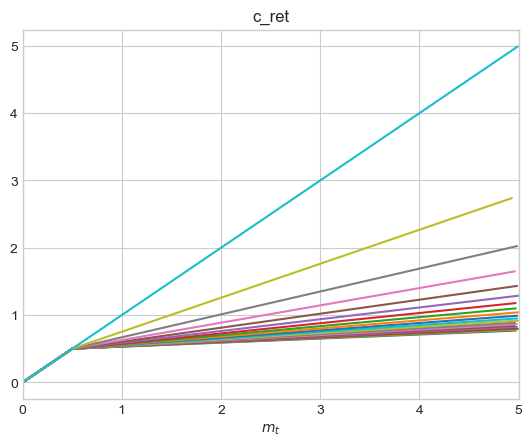

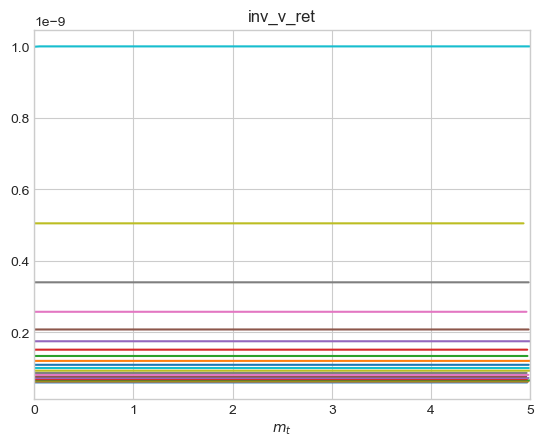

In [6]:
retirement(model_G2EGM_shocks)

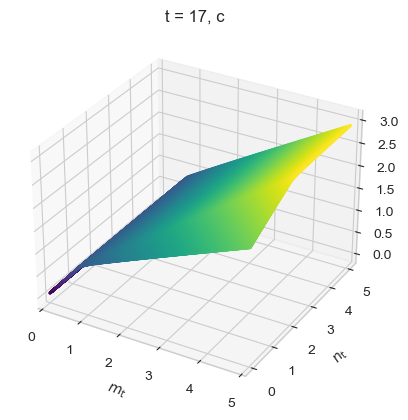

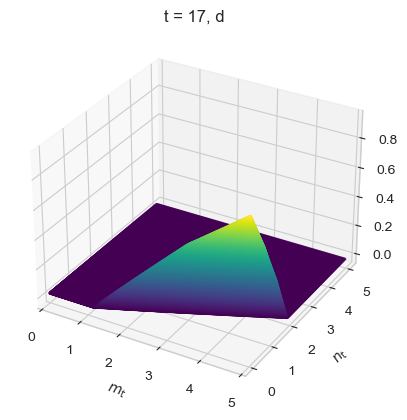

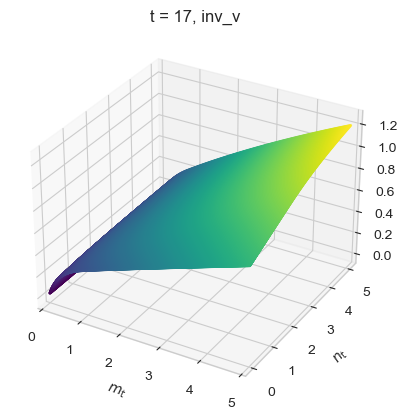

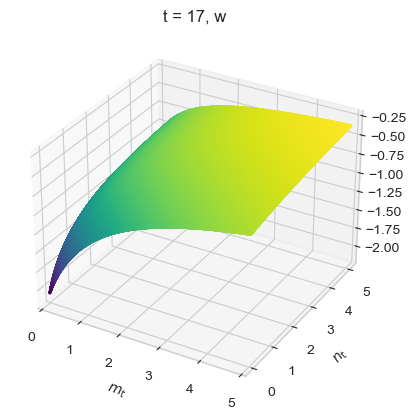

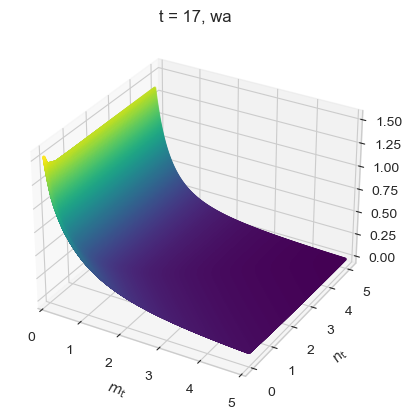

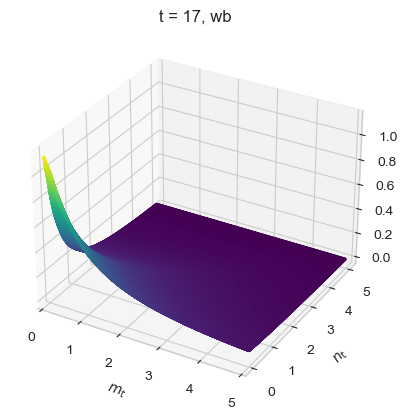

In [7]:
decision_functions(model_G2EGM_shocks, 17)

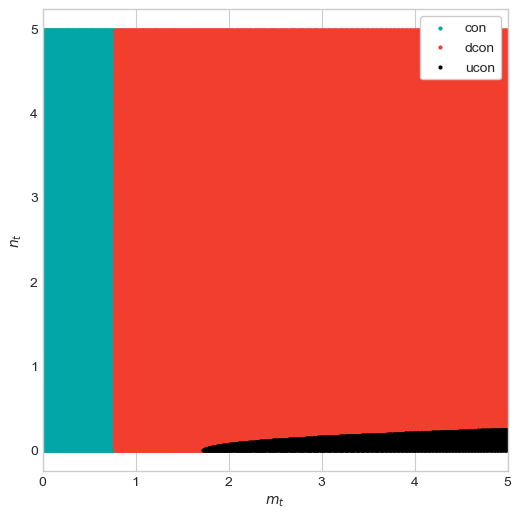

In [8]:
segments(model_G2EGM_shocks, 0)